In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import time

In [2]:
RANDOM_STATE = 101

### Load Data

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = wq_df.data.features 
y = wq_df.data.targets 

In [4]:
# Split into training and testing sets. Don't use test set until the very end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, stratify = y)

#### Balancing dataset

In [5]:
y = y_train
X = X_train

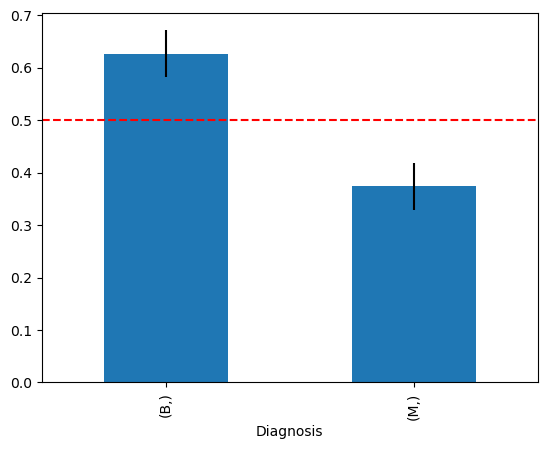

In [6]:
freqs =y.value_counts() /len(y)
std_errors = np.sqrt(freqs*(1-freqs)/len(y))
expected_frequency = 1/len(np.unique(y))

freqs.plot(kind='bar',yerr=std_errors*1.96)

plt.axhline(expected_frequency,color='red',linestyle='--')

### Model

#### Default

In [7]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(pipeline['model'].feature_importances_)

[0.         0.02319902 0.         0.         0.         0.
 0.00601504 0.05703123 0.00526316 0.         0.         0.
 0.         0.00733989 0.         0.         0.         0.03247863
 0.00561404 0.         0.01835132 0.01729264 0.74659495 0.
 0.         0.         0.02159124 0.01769522 0.04153362 0.        ]


In [8]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.92      0.94        72
           M       0.87      0.93      0.90        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [9]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipeline['model'].feature_importances_[i])

radius1 0.0
texture1 0.0231990231990232
perimeter1 0.0
area1 0.0
smoothness1 0.0
compactness1 0.0
concavity1 0.006015037593984964
concave_points1 0.05703122820749098
symmetry1 0.005263157894736842
fractal_dimension1 0.0
radius2 0.0
texture2 0.0
perimeter2 0.0
area2 0.007339894451576048
smoothness2 0.0
compactness2 0.0
concavity2 0.0
concave_points2 0.03247863247863248
symmetry2 0.005614035087719297
fractal_dimension2 0.0
radius3 0.018351323195105927
texture3 0.017292636834229633
perimeter3 0.7465949467035137
area3 0.0
smoothness3 0.0
compactness3 0.0
concavity3 0.02159124135087673
concave_points3 0.017695223618121318
symmetry3 0.04153361938498895
fractal_dimension3 0.0


In [10]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train, cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

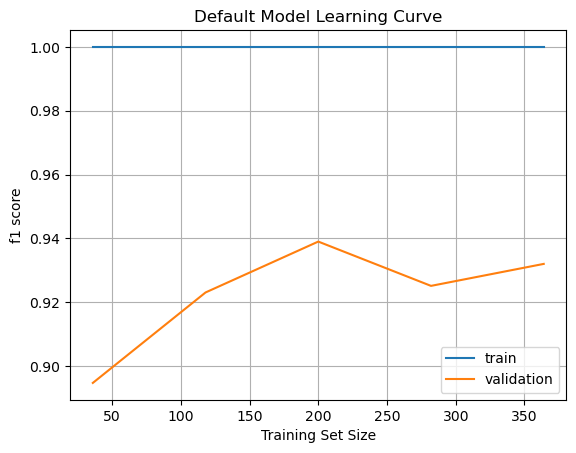

In [11]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Default Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()

plt.show()

#### Final Model

In [12]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
t0 = time.time()
pipeline.fit(X_train, y_train)
print("Training time:", time.time()-t0)
y_pred = pipeline.predict(X_test)
# print(clf.feature_importances_)

Training time: 0.01385498046875


In [13]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.92      0.94        72
           M       0.87      0.93      0.90        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [14]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train, cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

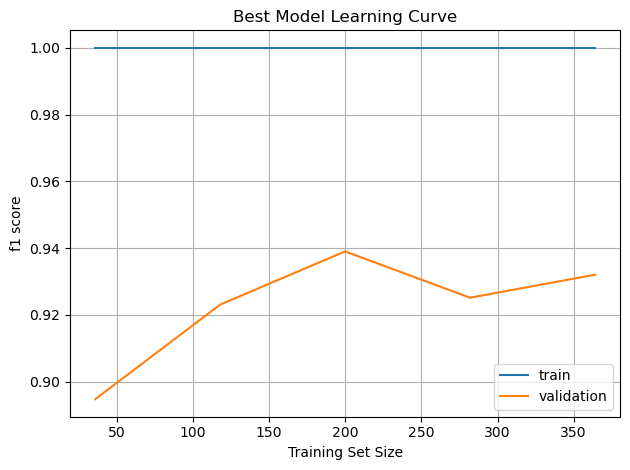

In [15]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Best Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.savefig('breast_cancer_plots/decision_tree_bc_best_learning_curve.png')
plt.show()

#### Sub/Optimal Learning Curve

In [16]:
# Suboptimal Model
clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=.005)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# print(clf.feature_importances_)

In [17]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.94      0.95        72
           M       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [18]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=.005)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train, cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=0)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
train_sizes1, train_scores1, validation_scores1 = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train, cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

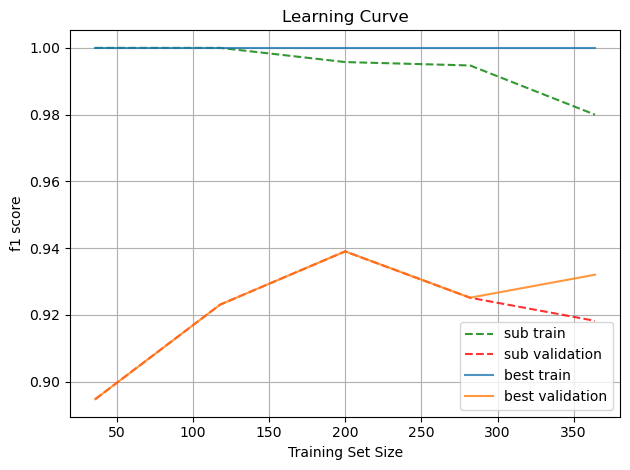

In [19]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)
train_mean1 = train_scores1.mean(axis=1)
validation_mean1 = validation_scores1.mean(axis=1)

plt.plot(train_sizes, train_mean, 'g--', alpha=.8, label="sub train")
plt.plot(train_sizes, validation_mean, 'r--', alpha=.8, label="sub validation")
plt.plot(train_sizes1, train_mean1, alpha=.8, label="best train")
plt.plot(train_sizes1, validation_mean1, alpha=.8, label="best validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.savefig('breast_cancer_plots/decision_tree_bc_combo_learning_curve.png')
plt.show()

### Validation Plot

In [20]:
from sklearn.model_selection import validation_curve
import numpy as np

#### CCP ALPHA (Pruning)

In [21]:
parameter_range = [0, .001, .0025, .005, .0075, .01, .1]
                   # , .25, .5, .6]
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
train_score, test_score = validation_curve(pipeline, X_train, y_train,
                                           param_name="model__ccp_alpha",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro")

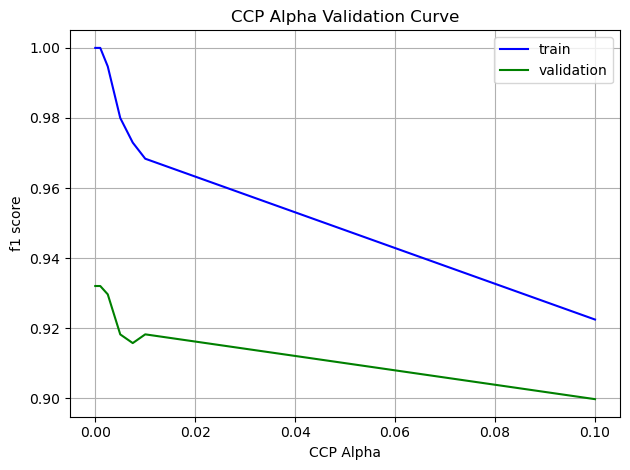

In [22]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="train", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("CCP Alpha Validation Curve")
plt.xlabel("CCP Alpha")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('breast_cancer_plots/decision_tree_bc_ccp_alpha_validation.png')
plt.show()


#### Max Depth

In [23]:
parameter_range = [1, 5, 10, 20]
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
train_score, test_score = validation_curve(clf, X_train, y_train,
                                           param_name="max_depth",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro")

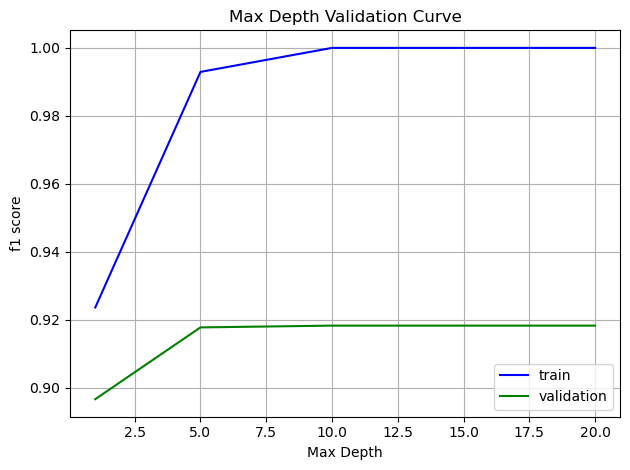

In [24]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="train", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')

# Creating the plot
plt.title("Max Depth Validation Curve")
plt.xlabel("Max Depth")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('breast_cancer_plots/decision_tree_bc_max_depth_validation.png')
plt.show()

### Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', clf)])
params = [{'model__ccp_alpha':[0, .001, .0025, .005, .0075, .01, .1, .25],
          'model__criterion': ['gini'],
          'model__splitter': ['best'],
          'model__max_depth': [None, 1, 5, 10, 50, 100]}]
grid = GridSearchCV(pipeline,
                      param_grid=params,
                      scoring='f1_macro',
                      cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'model__ccp_alpha': 0, 'model__criterion': 'gini', 'model__max_depth': None, 'model__splitter': 'best'}
              precision    recall  f1-score   support

           B       0.96      0.92      0.94        72
           M       0.87      0.93      0.90        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

